# Plotting with seaborn

In [4]:
%matplotlib inline
import pandas as pd
reviews = pd.read_csv("data/winemag-data_first150k.csv", index_col=0)
print(reviews.head(5))
import seaborn as sns

  country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN     

## Countplot

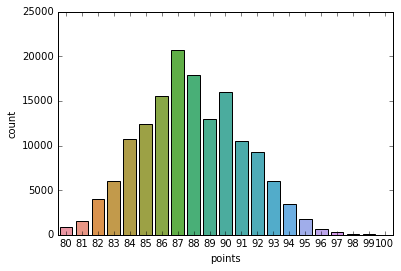

In [3]:
sns.countplot(reviews['points']) # dont need to you value_counts() to group data.

## KDE Plot

In [9]:
print(reviews['price'].dtype)
print(reviews['price'] < 200)

float64
0         False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16        False
17         True
18        False
19         True
20         True
21         True
22        False
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
150900     True
150901     True
150902     True
150903     True
150904     True
150905     True
150906     True
150907     True
150908     True
150909     True
150910     True
150911     True
150912     True
150913     True
150914     True
150915     True
150916     True
150917     True
150918     True
150919     True
150920     True
150921     True
150922    False
150923     True
150924     True
150925     True
150926     True
150927     True
150928     True
150929     True
Name: price, dty

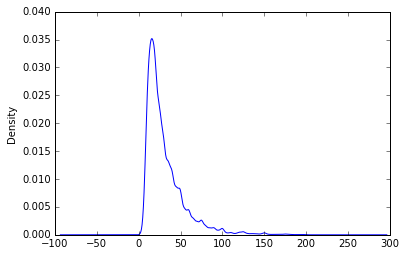

In [17]:
reviews[reviews['price'] < 200]['price'].plot(kind='kde')

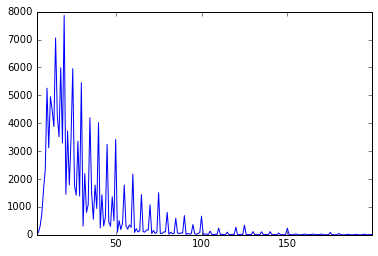

In [18]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

Bivariate KDE plots like this one are a great alternative to scatter plots and hex plots. They solve the same data overplotting issue that scatter plots suffer from and hex plots address, in a different but similarly visually appealing. However, note that bivariate KDE plots are very computationally intensive. We took a sample of 5000 points in this example to keep compute time reasonable.

## Distplot

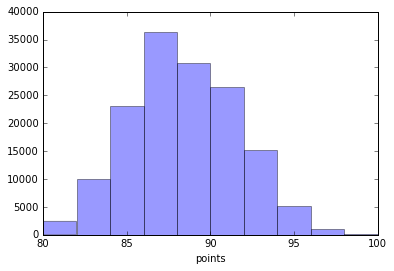

In [21]:
sns.distplot(reviews['points'], bins=10, kde=False)

## Scatterplot and hexplot

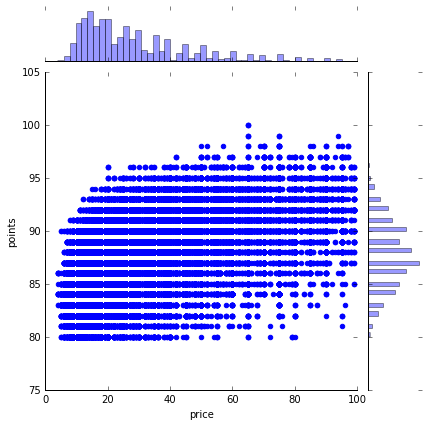

In [22]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

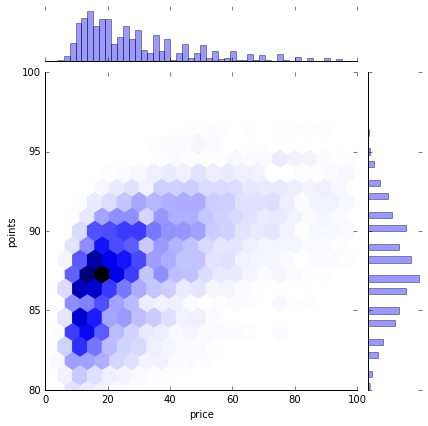

In [23]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)

## Boxplot and violin plot

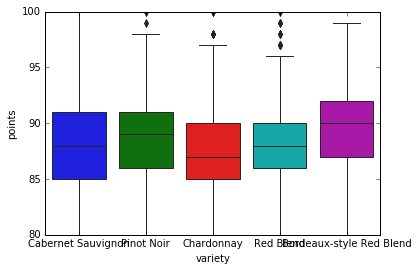

In [24]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)

The center of the distributions shown above is the "box" in boxplot. The top of the box is the 75th percentile, while the bottom is the 25th percentile. In other words, half of the data is distributed within the box! The green line in the middle is the median.

The other part of the plot, the "whiskers", shows the extent of the points beyond the center of the distribution. Individual circles beyond that are outliers.

Boxplots are great for summarizing the shape of many datasets. They also don't have a limit in terms of numeracy: you can place as many boxes in the plot as you feel comfortable squeezing onto the page.

However, they only work for interval variables and nominal variables with a large number of possible values; they assume your data is roughly normally distributed (otherwise their design doesn't make much sense); and they don't carry any information about individual values, only treating the distribution as a whole.

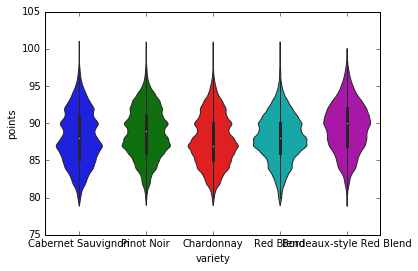

In [25]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
) # you can see the distribution of univarate.

# Examples

In [27]:
pokemon = pd.read_csv("data/Pokemon.csv", index_col=0)
pokemon.head()


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


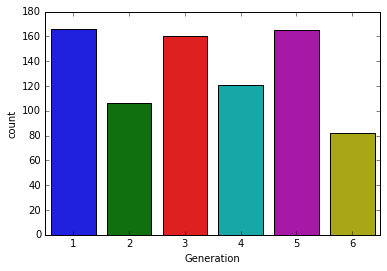

In [28]:
sns.countplot(pokemon['Generation'])

TypeError: slice indices must be integers or None or have an __index__ method

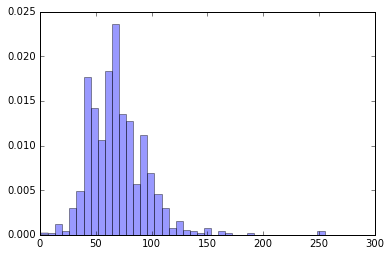

In [35]:
sns.distplot(pokemon['HP'])

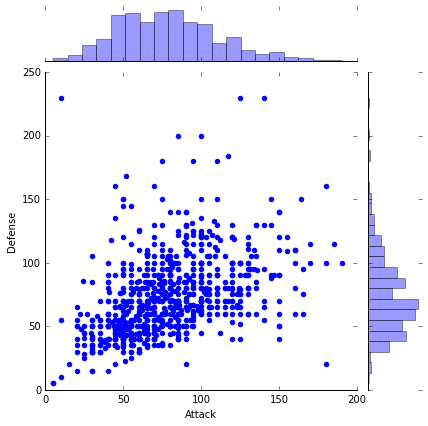

In [37]:
sns.jointplot(data=pokemon, x='Attack', y='Defense')

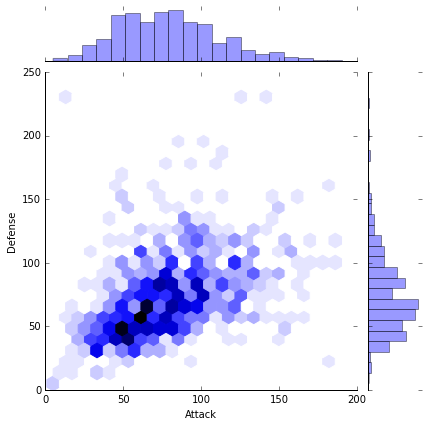

In [38]:
sns.jointplot(data=pokemon, x='Attack', y='Defense', kind='hex')

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


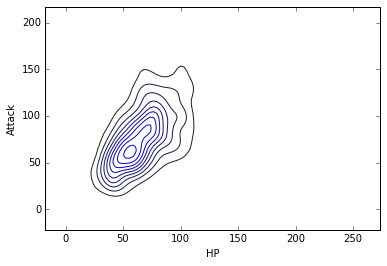

In [39]:
sns.kdeplot(pokemon['HP'], pokemon['Attack'])

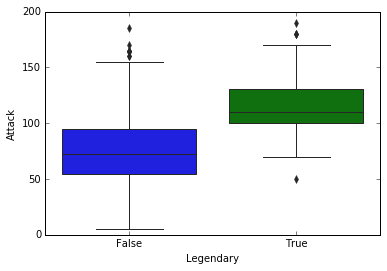

In [41]:
sns.boxplot(x='Legendary', y='Attack', data=pokemon)

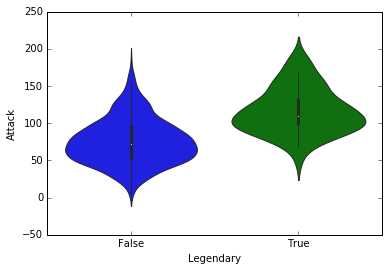

In [42]:
sns.violinplot(x='Legendary', y='Attack', data=pokemon)